# ***Bangalore House Price Prediction.***

## ***Description.***

### What are the things that a potential home buyer considers before purchasing a house? The location, the size of the property, vicinity to offices, schools, parks, restaurants, hospitals or the stereotypical white picket fence? What about the most important factor — the price?

### Now with the lingering impact of demonetization, the enforcement of the Real Estate (Regulation and Development) Act (RERA), and the lack of trust in property developers in the city, housing units sold across India in 2017 dropped by 7 percent. In fact, the property prices in Bengaluru fell by almost 5 percent in the second half of 2017, said a study published by property consultancy Knight Frank.

### For example, for a potential homeowner, over 9,000 apartment projects and flats for sale are available in the range of ₹42-52 lakh, followed by over 7,100 apartments that are in the ₹52-62 lakh budget segment, says a report by property website Makaan. According to the study, there are over 5,000 projects in the ₹15-25 lakh budget segment followed by those in the ₹34-43 lakh budget category.

### Buying a home, especially in a city like Bengaluru, is a tricky choice. While the major factors are usually the same for all metros, there are others to be considered for the Silicon Valley of India. With its help millennial crowd, vibrant culture, great climate and a slew of job opportunities, it is difficult to ascertain the price of a house in Bengaluru.

## ***Problem Statement.***

### By analyzing these Bangalore house data we will determine the approximate price for the houses.

## ***Data Description.***


*   **Area_type** : Description of the area.
*   **Availability** : When it can be possessed or when it is ready.
*   **Location** : Where it is located in Bengaluru.
*   **Size** : BHK or Bedrooms.
*   **Society** : To which society it belongs.
*   **Total_sqft** : Size of the property in sq.ft.
*   **Bath** : No. of Bathrooms.
*   **Balcony** : No. of the Balcony.
*   **Price** : Value of the property in lakhs (Indian Rupee - **₹** ).

## ***Business Objectives and Constraints.***
#### 1. The cost of a mis-classification can be high.
#### 2. There is strict latency concerns.
#### 3. From this project we will able to understand how house prices depend on other factors.

## ***Importing Libraries.***

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

## ***Loading and Checking the Dataset.***

In [150]:
data=pd.read_csv("D:/acet project/dataset/Bengaluru_House_Data.csv")
df = data.copy()

In [151]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## ***Exploratory Data Analysis (EDA).***

## ***Checking Shape of the Dataset.***

In [152]:
df.shape

(13320, 9)

## ***How Many Columns are Present in the Dataset?***

In [153]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [154]:
df.columns.nunique()

9

## ***Informations about the Dataset.***

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


#### To know the description about the dataset

In [156]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [157]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


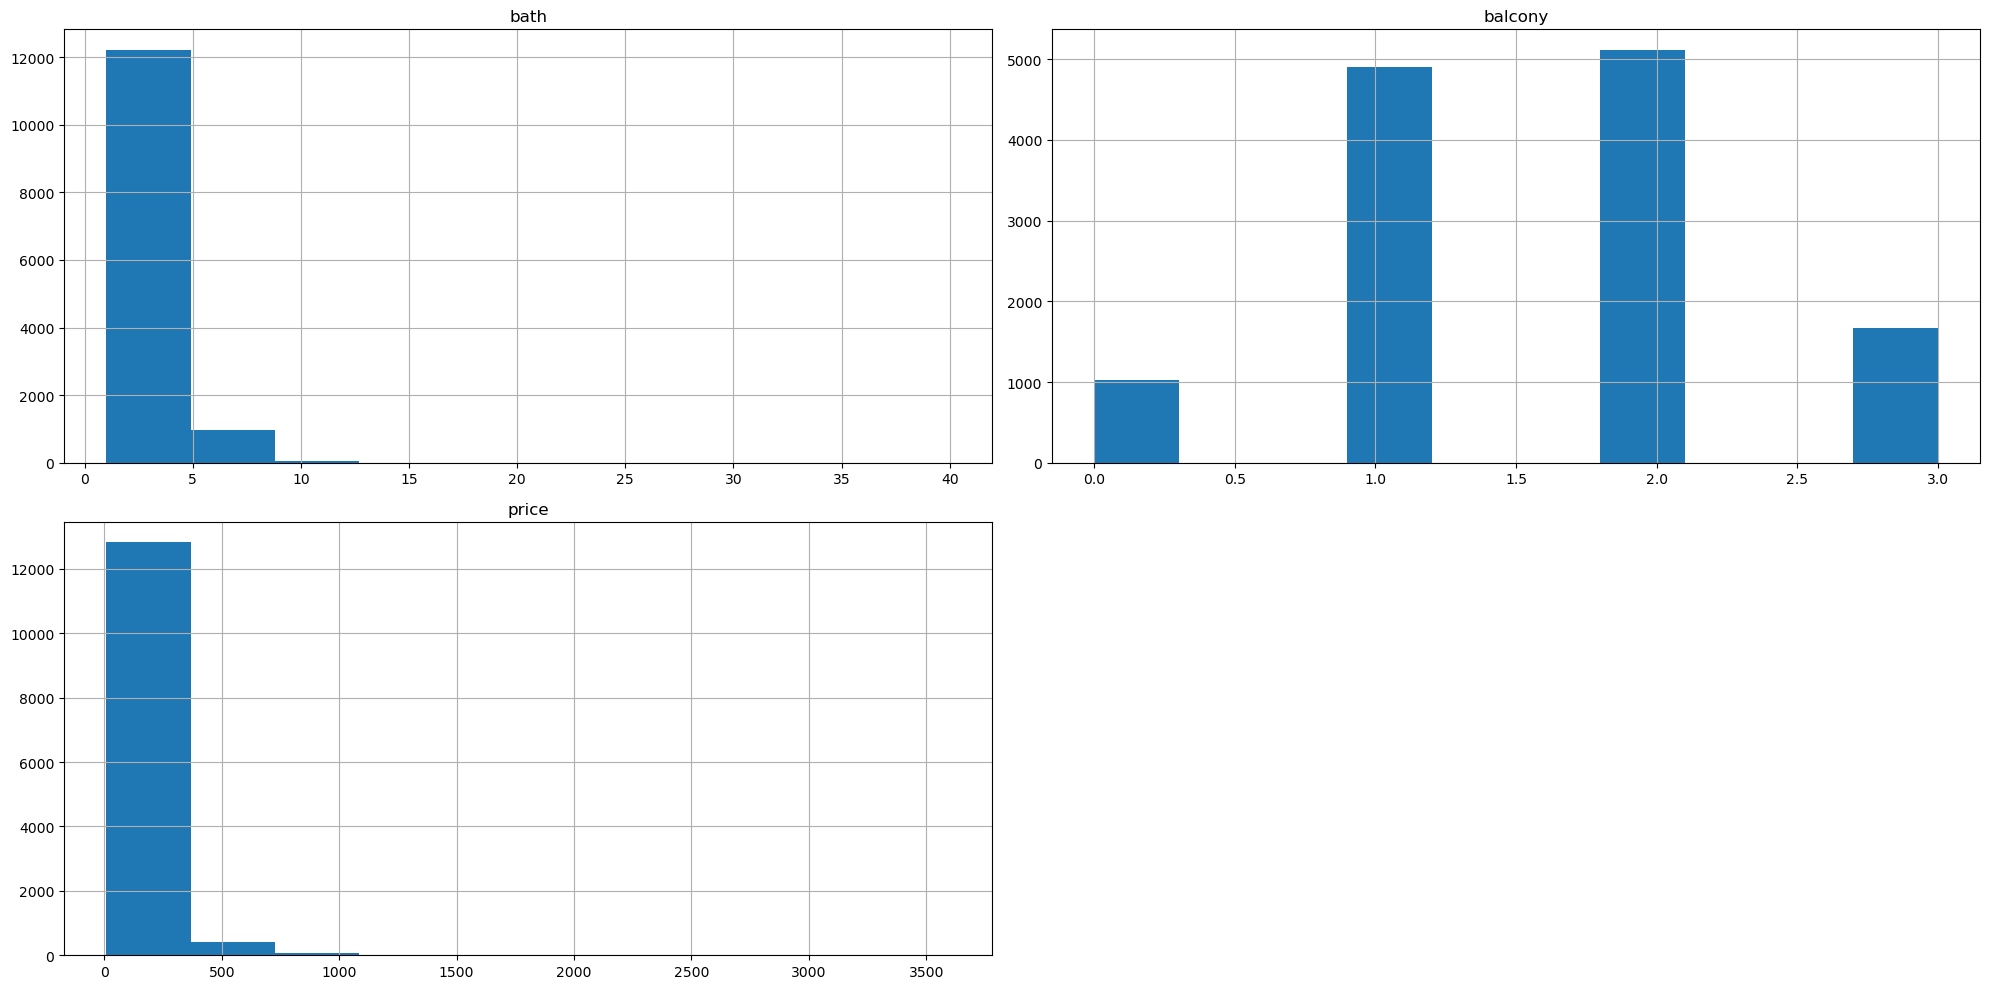

In [158]:
df.hist()
plt.tight_layout()
plt.show()

## ***Checking if there is some null values or not.***

In [159]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

## ***Performing Group by operation on Area Type***

In [160]:
df.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

## ***Checking what different "Area Types" are present in the Dataset***

In [161]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

# ***Data Visualization.***

<Axes: >

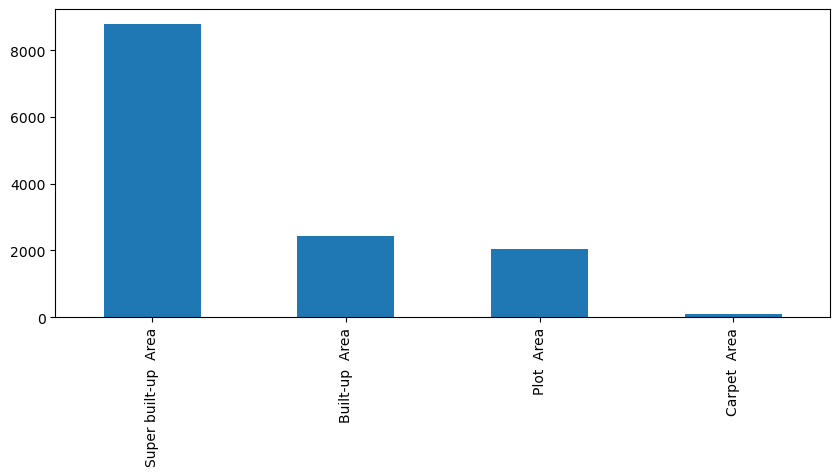

In [162]:
plt.figure(figsize=(10,4))
df.area_type.value_counts().plot(kind='bar')

In [163]:
df['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

<Axes: >

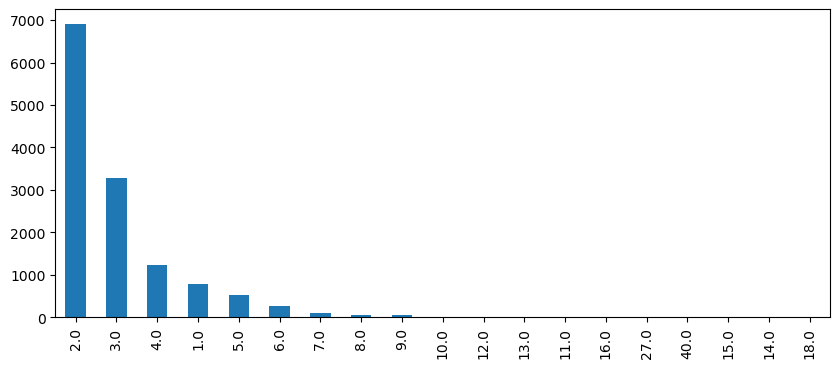

In [164]:
plt.figure(figsize=(10,4))
df.bath.value_counts().plot(kind='bar')

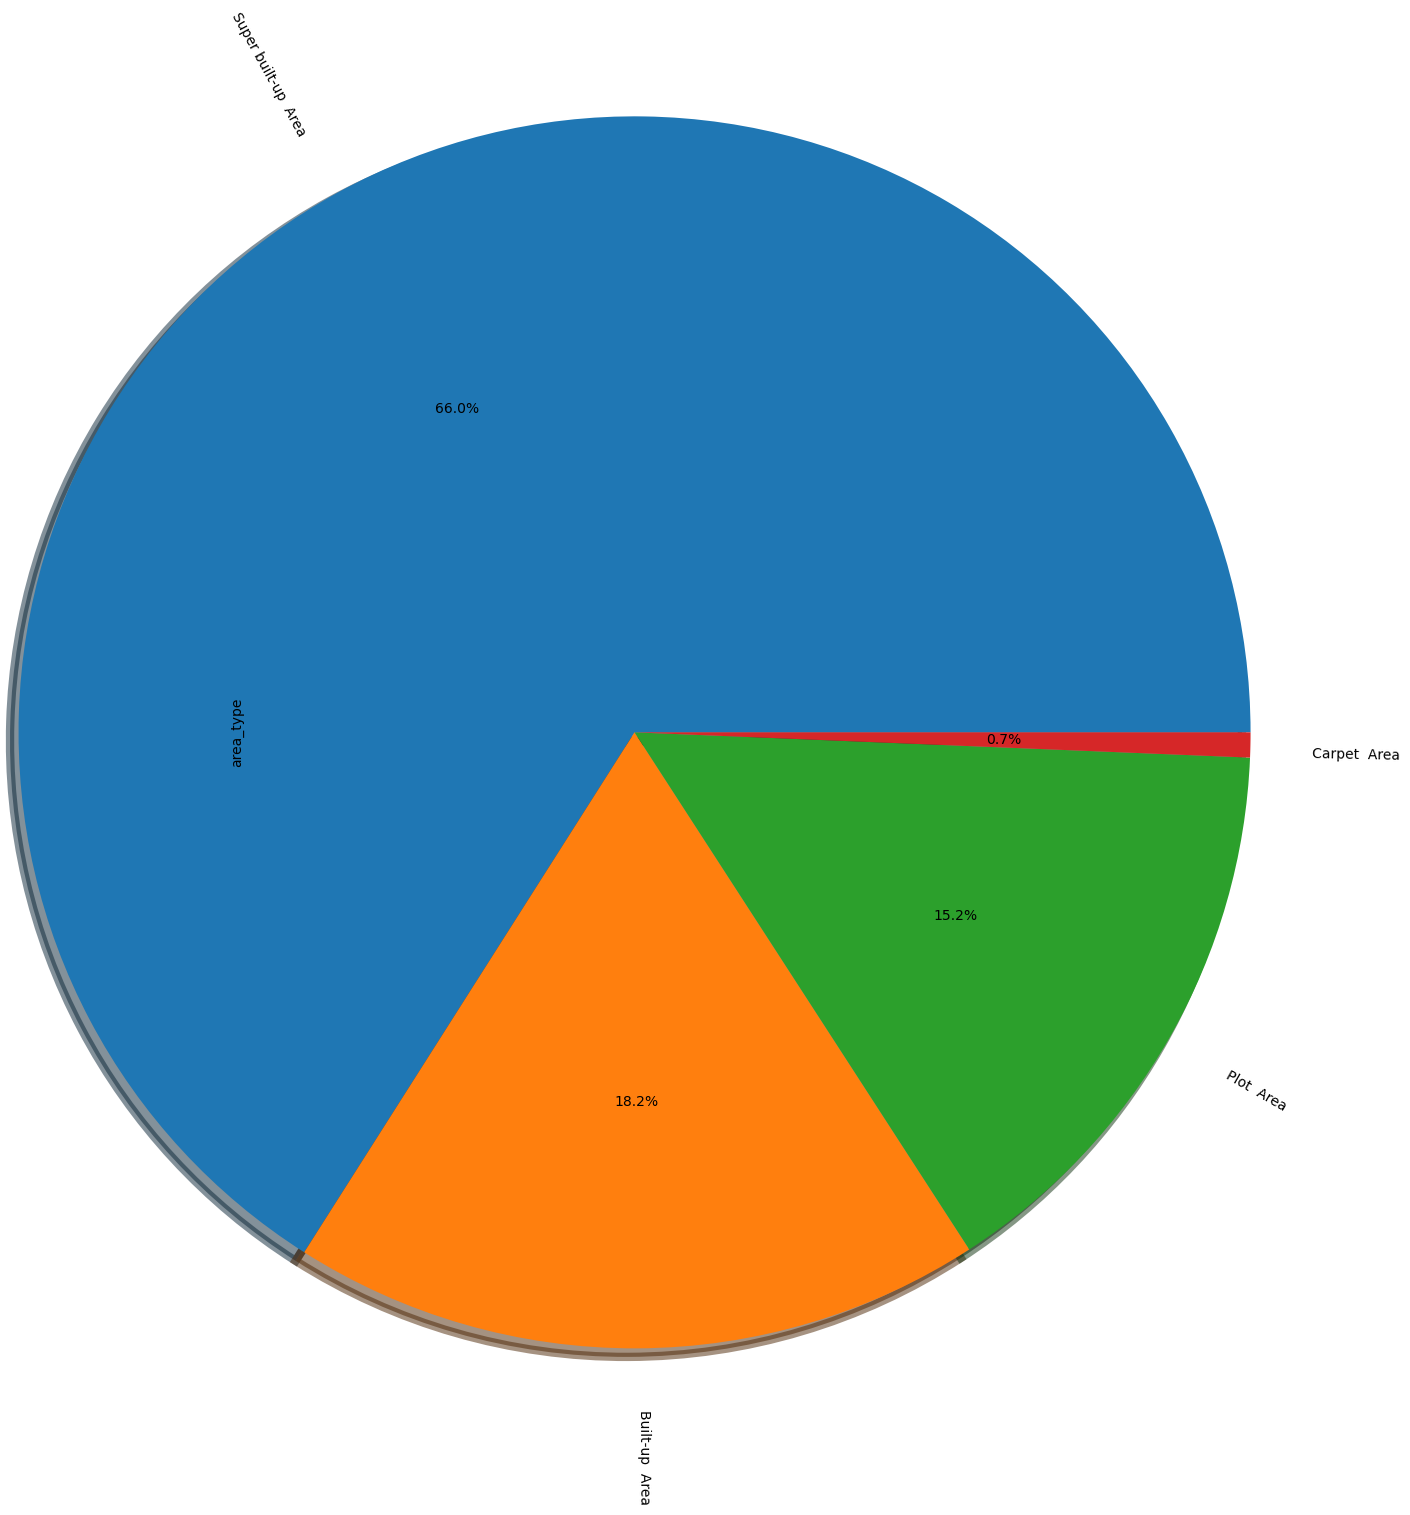

In [165]:
(df["area_type"].value_counts()).plot.pie(autopct="%.1f%%", shadow=True,rotatelabels=True, wedgeprops={'linewidth': 6}, radius=2)
plt.show()

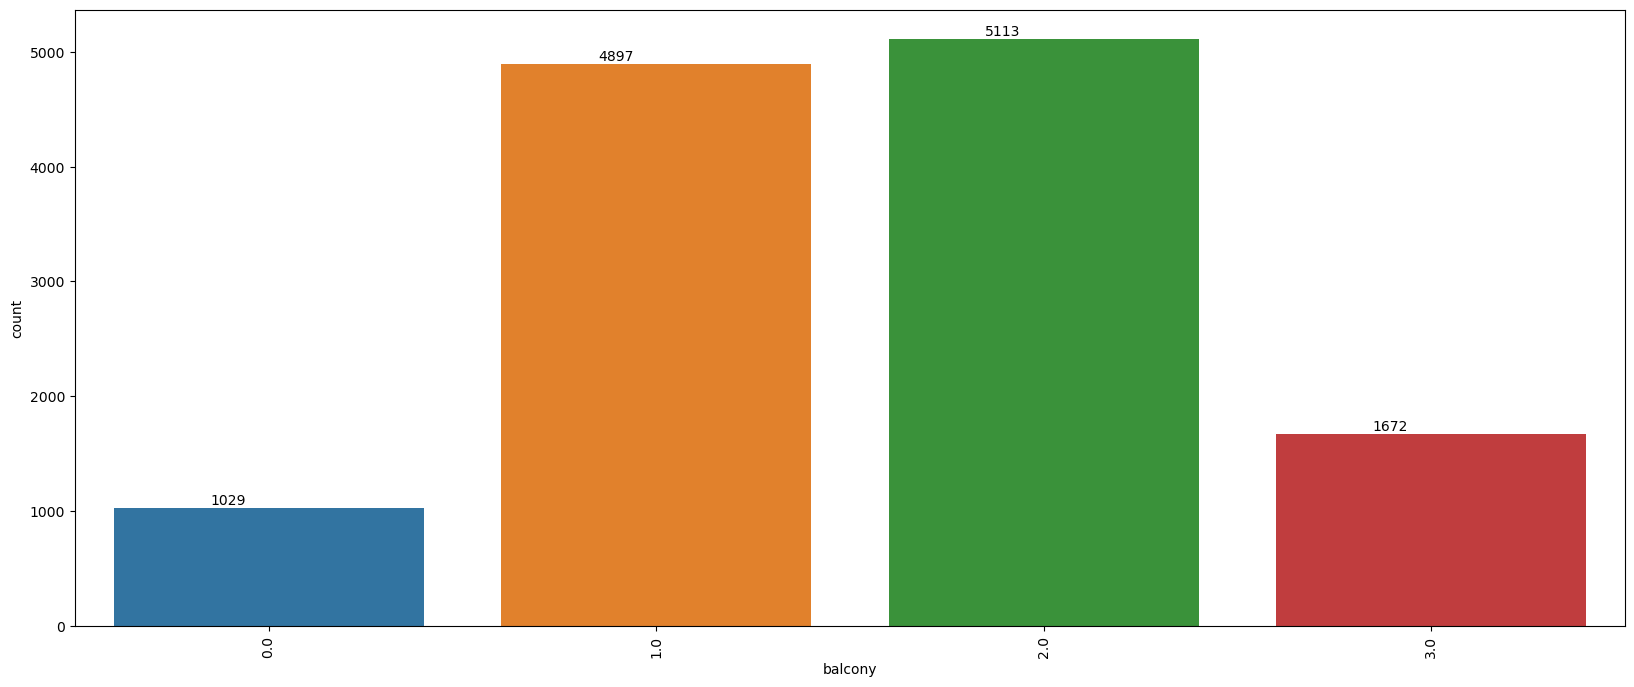

In [166]:
plt.figure(figsize = (20,8))
ax=sns.countplot(x = 'balcony', data = df)
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

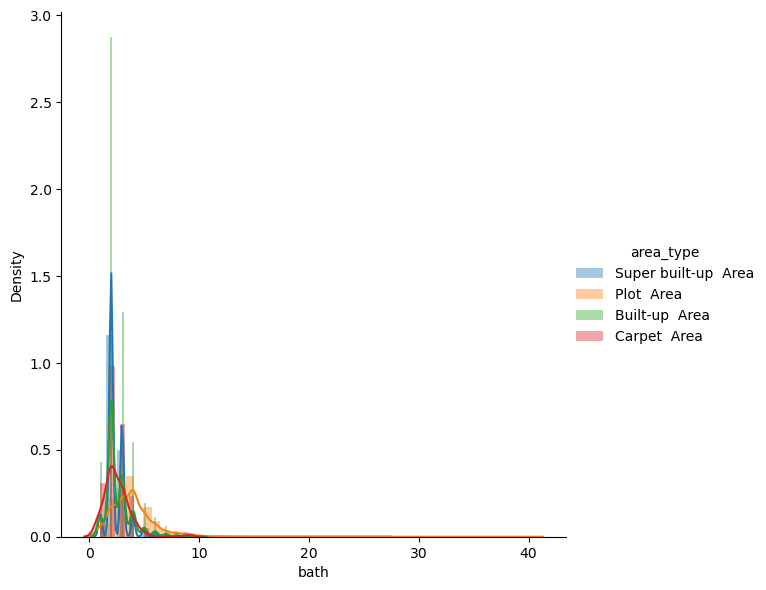

In [167]:
sns.FacetGrid(df, hue='area_type', height=6).map(sns.distplot, 'bath').add_legend()
plt.show()

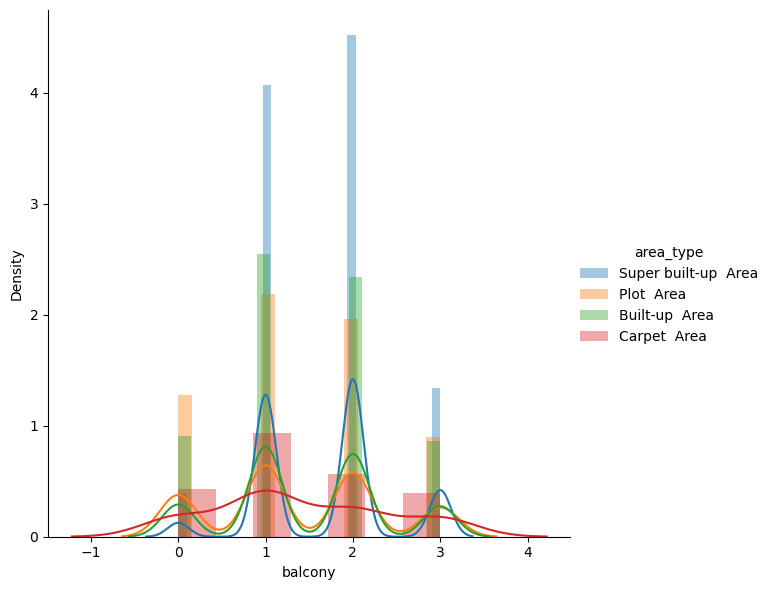

In [168]:
sns.FacetGrid(df, hue='area_type', height=6).map(sns.distplot, 'balcony').add_legend()
plt.show()

### ***Dropping less important features.***

In [169]:
df = df.drop(["area_type", "society","balcony", "availability"], axis = "columns")

In [170]:
df.shape

(13320, 5)

### ***Droppping Null Values.***

In [171]:
df=df.dropna()

In [172]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [173]:
df.shape

(13246, 5)

# ***Feature Engineering.***

Applying unique function on feature called Size.

In [174]:
df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

From the above we can clearly see that Bedroom is represented with 2 different methods. One is BHK and the other one is Bedroom. So we are making a new column called BHK and we are discarding all the units (like BHK, Bedroom).

In [175]:
df['BHK'] = df["size"].apply(lambda x: int(x.split(" ")[0]))

In [176]:
df.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


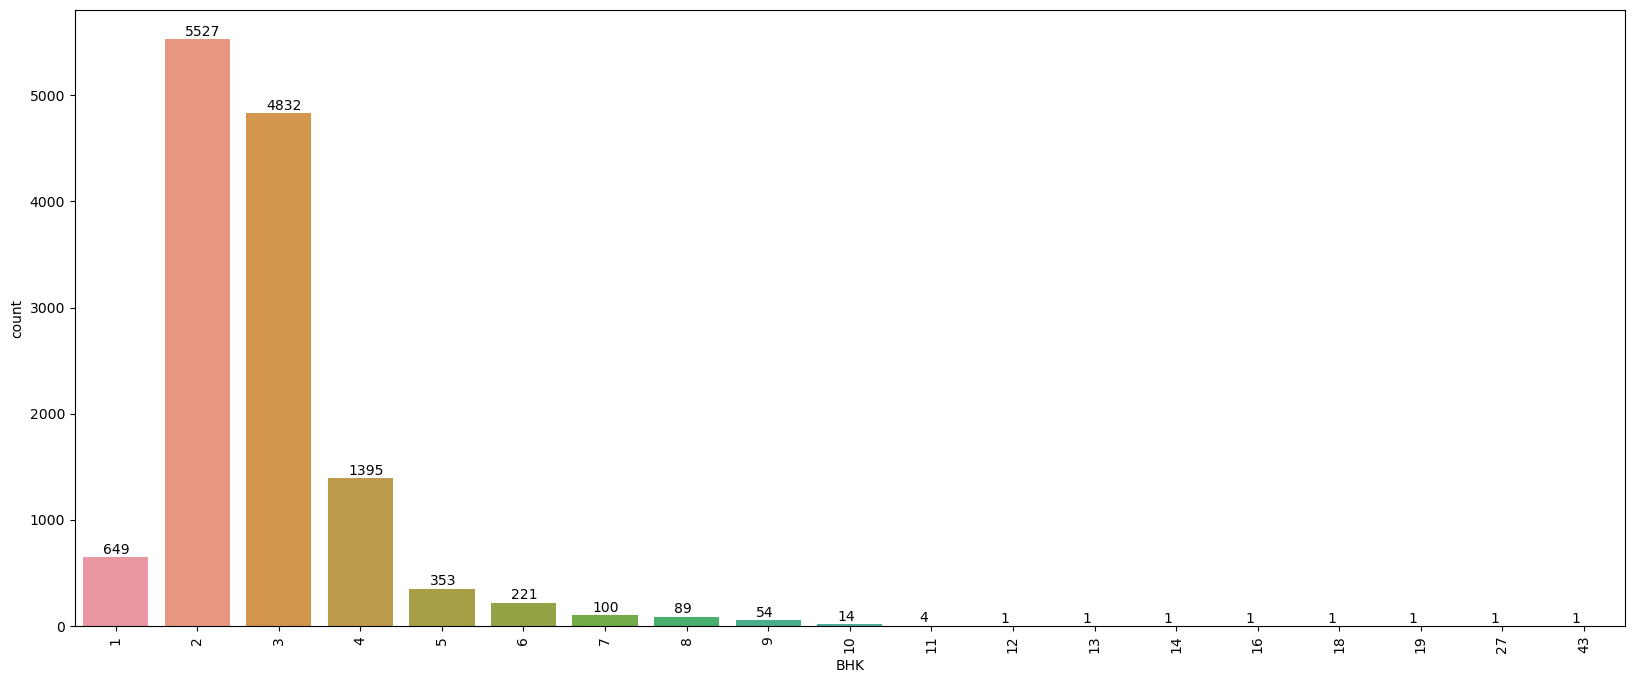

In [177]:
plt.figure(figsize = (20,8))
ax=sns.countplot(x = 'BHK', data = df)
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

In [178]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

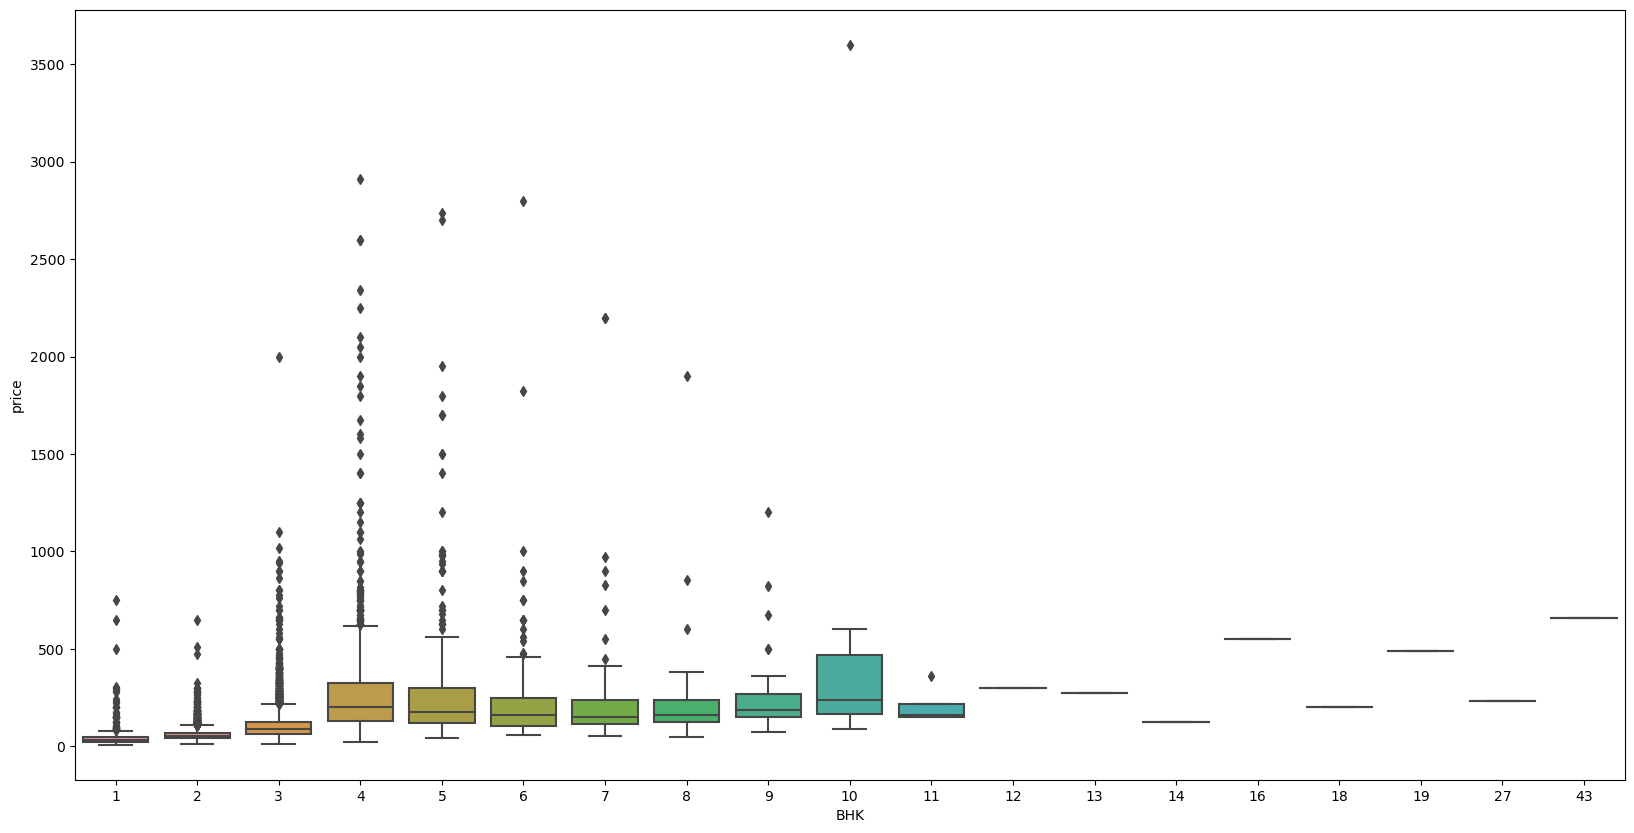

In [179]:
sns.boxplot(x = 'BHK', y = 'price', data = df)
plt.show()

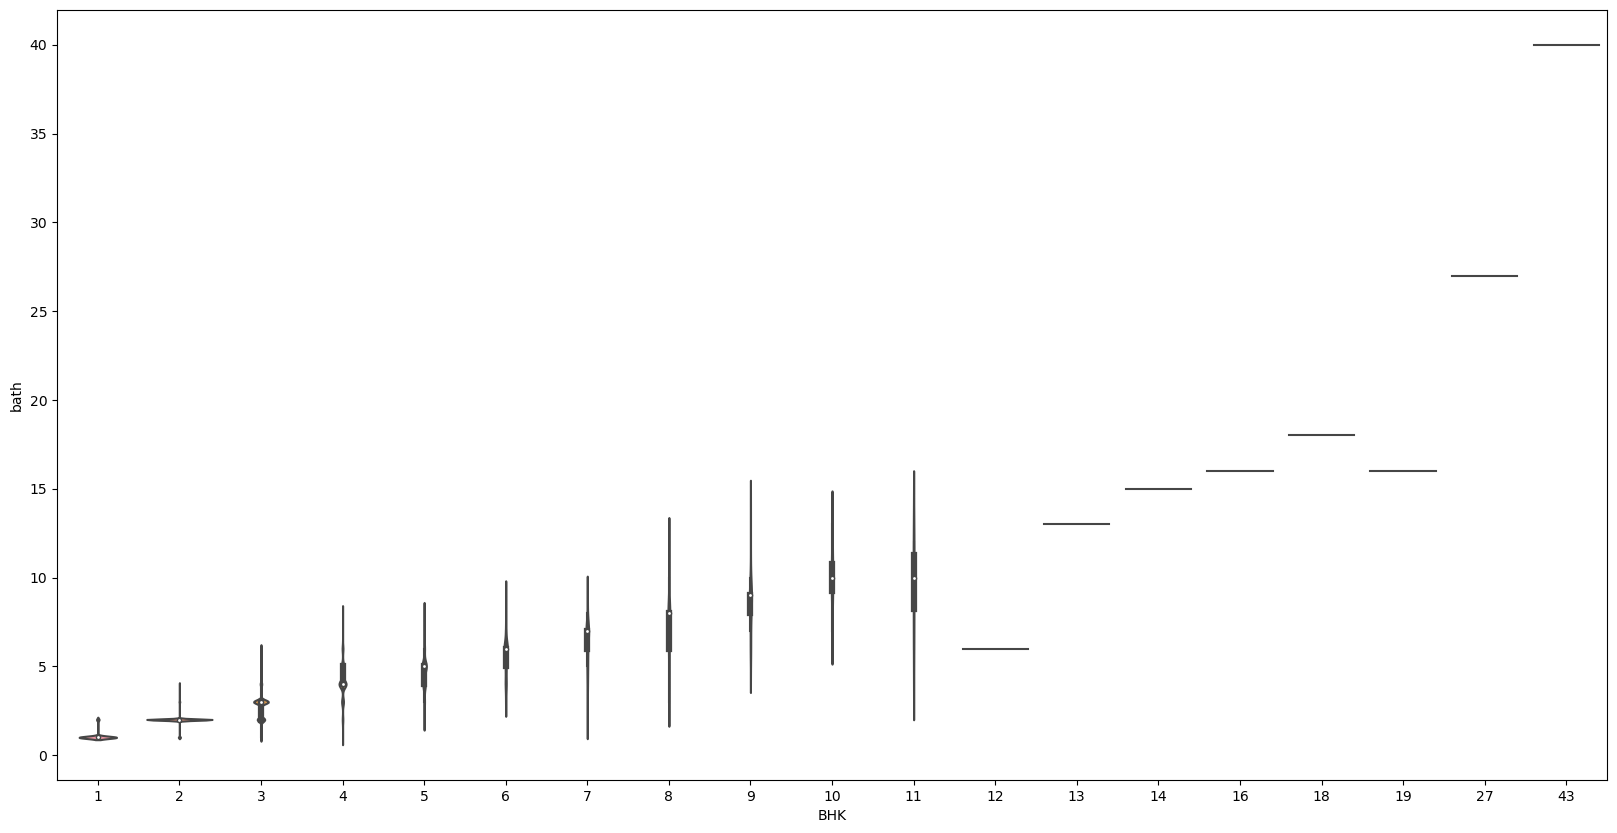

In [180]:
sns.violinplot(x='BHK', y = 'bath', data = df)
plt.show()

## ***Exploring total_sqft feature.***

In [181]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [182]:
df[~df["total_sqft"].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


From the above we can see that total_sqft can be a range (say, 3090-5002). For such cases we can just take average of the minimum and maximum value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. So, we are going to just drop such corner cases to keep things simple.

### ***Converting Sq.Ft to Number.***

In [183]:
def convert_sqft_to_number(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [184]:
df = df.copy()
df["total_sqft"] = df["total_sqft"].apply(convert_sqft_to_number)
df.head(10)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


### ***Here, adding a new feature called Price per Square Feet.***

In [185]:
df = df.copy()
df["price_per_sqft"] = df["price"]*100000/df["total_sqft"]
df.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


Here, we are going to use Dimentionality Reduction for the data which are categorical variable. We need to apply Dimensionality Reduction here to reduce number of locations.

In [186]:
df.location = df.location.apply(lambda x: x.strip())
location_stats = df['location'].value_counts(ascending=False)
location_stats

Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: location, Length: 1293, dtype: int64

In [187]:
len(location_stats[location_stats<=10])

1052

In [188]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Naganathapura                     10
Sadashiva Nagar                   10
Nagappa Reddy Layout              10
BTM 1st Stage                     10
Sector 1 HSR Layout               10
                                  ..
Vasantapura main road              1
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Abshot Layout                      1
Name: location, Length: 1052, dtype: int64

In [189]:
df.location = df.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df.location.unique())

242

In [190]:
df.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


Here we will discard some more data. Because, normally if a square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft). If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft.

In [191]:
df[df.total_sqft/df.BHK<300].head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [192]:
df=df[~(df.total_sqft/df.BHK<300)]
df.shape

(12502, 7)

Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one Standard Deviation.

In [193]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df = remove_pps_outliers(df)
df.shape

(10241, 7)

### ***Ploting the Scatter Chart for 2 BHK and 3 BHK properties.***

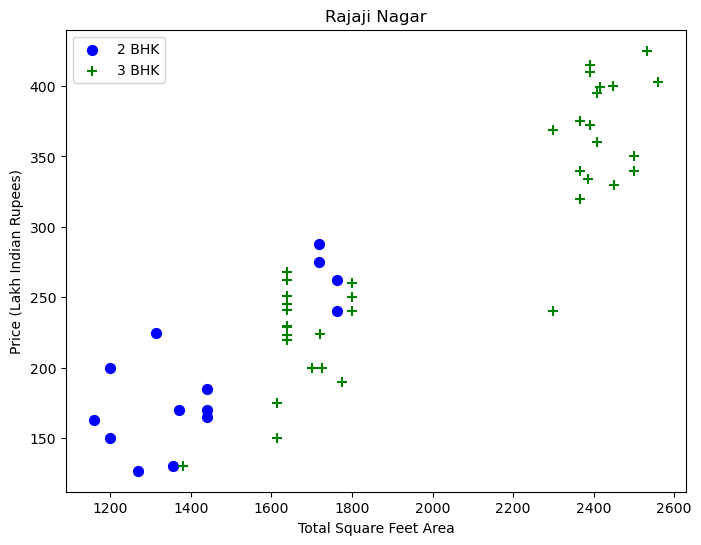

In [194]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (8,6)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df,"Rajaji Nagar")

### remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [195]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df = remove_bhk_outliers(df)
df.shape

(7329, 7)

## Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties

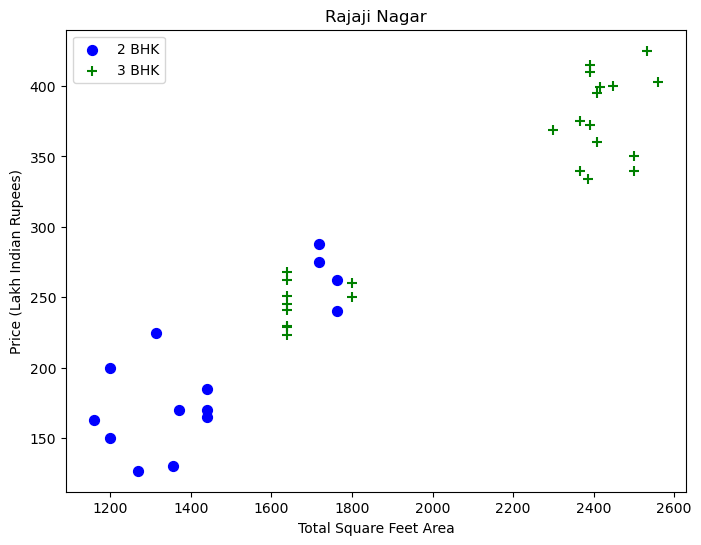

In [196]:
plot_scatter_chart(df,"Rajaji Nagar")

### ***Ploting the histogram for Price Per Square Feet vs Count.***

Text(0, 0.5, 'Count')

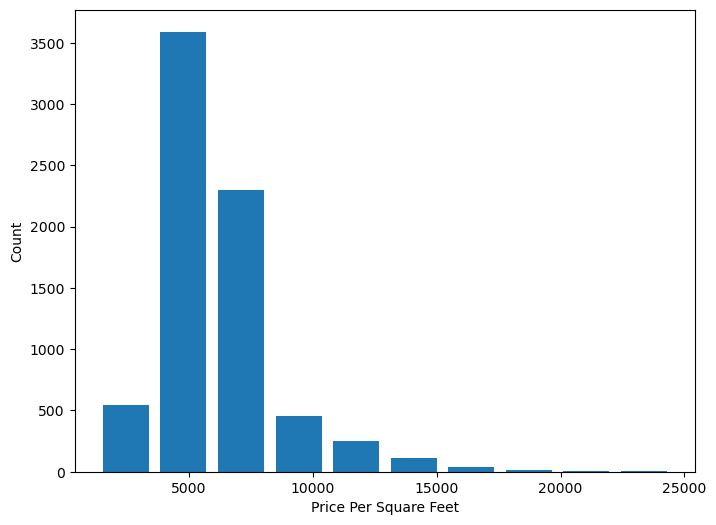

In [197]:
plt.hist(df.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

### ***Ploting the histogram for Number of bathrooms vs Count.***

Text(0, 0.5, 'Count')

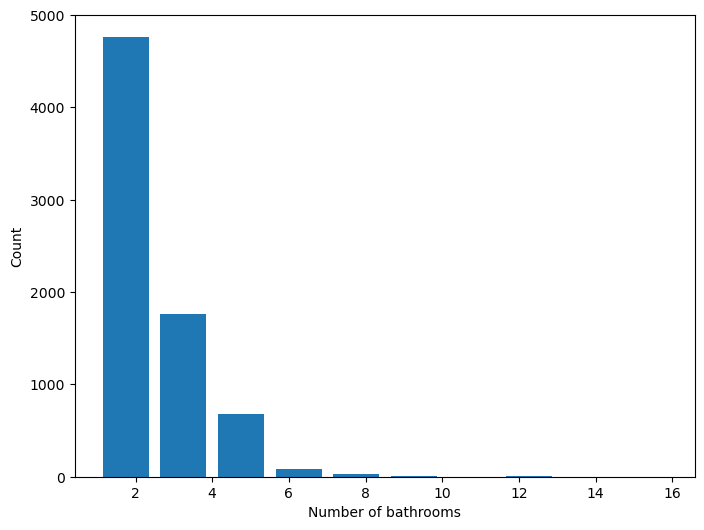

In [198]:
plt.hist(df.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [199]:
df[df.bath>10]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


It is unusual to have 2 more bathrooms than number of bedrooms in a home. So we are discarding that also.

In [200]:
df = df[df.bath<df.BHK+2]

In [201]:
df.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


### ***Using Label Encoding for Location.***

In [202]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoded_col = encoder.fit_transform(df[["location"]])
df["encoded_loc"] = encoded_col

In [203]:
encoder.classes_

array(['1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       'AECS Layout', 'Abbigere', 'Akshaya Nagar', 'Ambalipura',
       'Ambedkar Nagar', 'Amruthahalli', 'Anandapura', 'Ananth Nagar',
       'Anekal', 'Anjanapura', 'Ardendale', 'Arekere', 'Attibele',
       'BEML Layout', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya',
       'Badavala Nagar', 'Balagere', 'Banashankari',
       'Banashankari Stage II', 'Banashankari Stage III',
       'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi',
       'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road',
       'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur',
       'Begur Road', 'Bellandur', 'Benson Town', 'Bharathi Nagar',
       'Bhoganhalli', 'Billekahalli', 'Binny Pete', 'Bisuvanahalli',
       'Bommanahalli'

In [204]:
df.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft,encoded_loc
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860,0
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491,0
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333,0
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333,0
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668,0


### Making dictionary for encoded location for cross checking

In [205]:
location_dictionary = []
for i in encoder.classes_:
        location_dictionary.append([i,encoder.transform([[i]])[0]])
location_dictionary = pd.DataFrame(location_dictionary,columns=["location","encoded"])
location_dictionary

,location,encoded
0,1st Block Jayanagar,0
1,1st Phase JP Nagar,1
2,2nd Phase Judicial Layout,2
3,2nd Stage Nagarbhavi,3
4,5th Block Hbr Layout,4
...,...,...
237,Yelahanka,237
238,Yelahanka New Town,238
239,Yelenahalli,239
240,Yeshwanthpur,240


### ***Spliting Data and Dropping some columns***

In [206]:
X = df.drop(['location','size','price_per_sqft','price'],axis='columns')
X.head()

,total_sqft,bath,BHK,encoded_loc
0,2850.0,4.0,4,0
1,1630.0,3.0,3,0
2,1875.0,2.0,3,0
3,1200.0,2.0,3,0
4,1235.0,2.0,2,0


In [207]:
y = df.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [208]:
X.shape

(7251, 4)

In [209]:
y.shape

(7251,)

## Machine Learning Model Development

In [210]:
#importing neccessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [211]:
# train and test data splitting
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=41)
print('Shape of x_train is {}'.format(x_train.shape))
print('Shape of x_test is {}'.format(x_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

Shape of x_train is (6525, 4)
Shape of x_test is (726, 4)
Shape of y_train is (6525,)
Shape of y_test is (726,)


In [212]:
#model training
def modelevaluation(x_train,y_train,x_test,y_test):
    models = {"LR":LinearRegression(),"DT":DecisionTreeRegressor(),
              "EN":ElasticNet()}
    for i in models.keys():
        regressor_model = models[i]
        regressor_model.fit(x_train,y_train)
        y_pred = regressor_model.predict(x_test)
        print('_'*50)
        print(models[i])
        print("Accuracy Score is:",r2_score(y_test,y_pred))
        print("MSE:",mean_squared_error(y_test,y_pred))
        print("MAE:",mean_absolute_error(y_test,y_pred))

In [213]:
modelevaluation(x_train,y_train,x_test,y_test)

__________________________________________________
LinearRegression()
Accuracy Score is: 0.7276985403562471
MSE: 1733.9815095901956
MAE: 23.306535767308954
__________________________________________________
DecisionTreeRegressor()
Accuracy Score is: 0.582729602106449
MSE: 2657.125508593875
MAE: 22.586367445163994
__________________________________________________
ElasticNet()
Accuracy Score is: 0.7281269733891832
MSE: 1731.2533018230372
MAE: 23.281732852506536


#### Linear Regression is performing the best out of all, So we are developing model with it

In [214]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)
y_pred = lr_model.predict(x_test)
print("Accuracy Score is:",r2_score(y_test,y_pred)*100)



Accuracy Score is: 72.76985403562472


## Exporting models using Pickle module

In [215]:
lr_model

LinearRegression()

In [216]:
encoder

LabelEncoder()

In [217]:
import pickle
pickle.dump(encoder, open("labelencoder.pkl", "wb"))
pickle.dump(lr_model, open("model.pkl", "wb"))